In [12]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

Defining the Data Frame using the CSV file.

In [13]:
df = pd.read_csv('/content/drive/MyDrive/portfolio-work/Boston-Housing/boston_housing/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [15]:
X = df

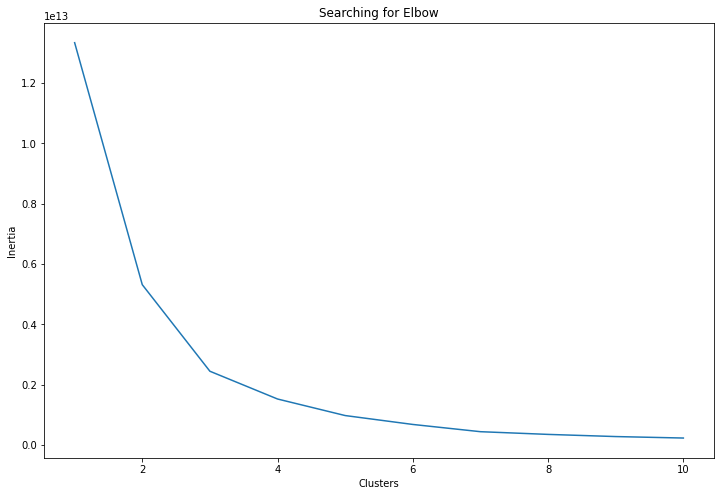

In [16]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')



plt.show()

In [17]:
X

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [18]:
X_s =  X.drop('MEDV', axis=1)

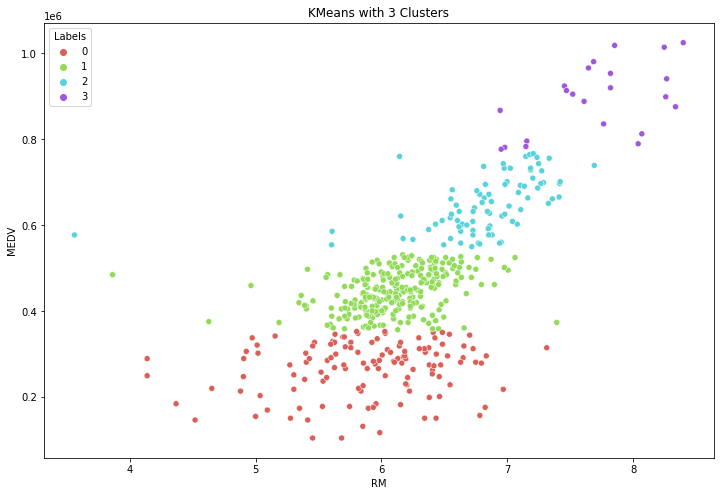

In [19]:
km3 = KMeans(n_clusters=4).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['RM'],X['MEDV'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 3 Clusters')
plt.show()

In [20]:
X["Labels"].unique()

array([1, 2, 0, 3], dtype=int32)

In [21]:
X_s

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


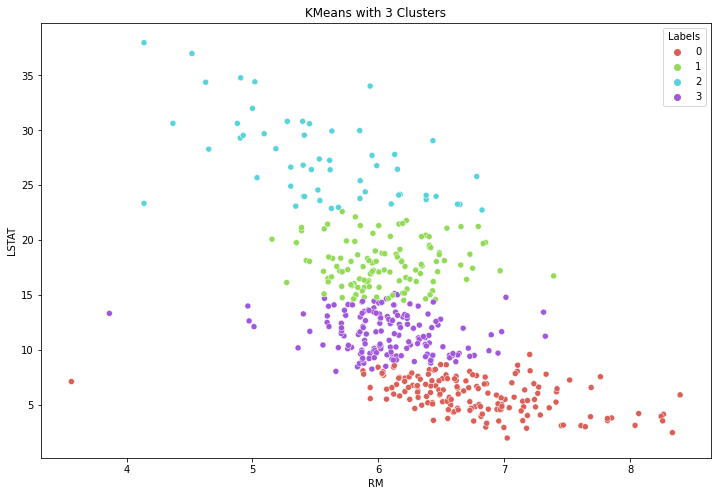

In [22]:
km3_1 = KMeans(n_clusters=4).fit(X_s)

X_s['Labels'] = km3_1.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X_s['RM'],X_s['LSTAT'], hue=X_s['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 3 Clusters')
plt.show()

In [25]:
X_s["Labels"].unique()

array([0, 3, 1, 2], dtype=int32)

In [26]:
X_s

,RM,LSTAT,PTRATIO,Labels
0,6.575,4.98,15.3,0
1,6.421,9.14,17.8,3
2,7.185,4.03,17.8,0
3,6.998,2.94,18.7,0
4,7.147,5.33,18.7,0
...,...,...,...,...
484,6.593,9.67,21.0,3
485,6.120,9.08,21.0,3
486,6.976,5.64,21.0,0
487,6.794,6.48,21.0,0


In [30]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 12], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, label_group in enumerate(km3_1.predict(client_data)):
    print(label_group)


1
2
0
